In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [84]:
# Load the data into a DataFrame
df = pd.read_csv('fy25-adopted-operating-budget.csv')

columns_to_convert = ['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget'] 
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce') 
result = df.groupby("Expense Category")[columns_to_convert].sum()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
result = result.T


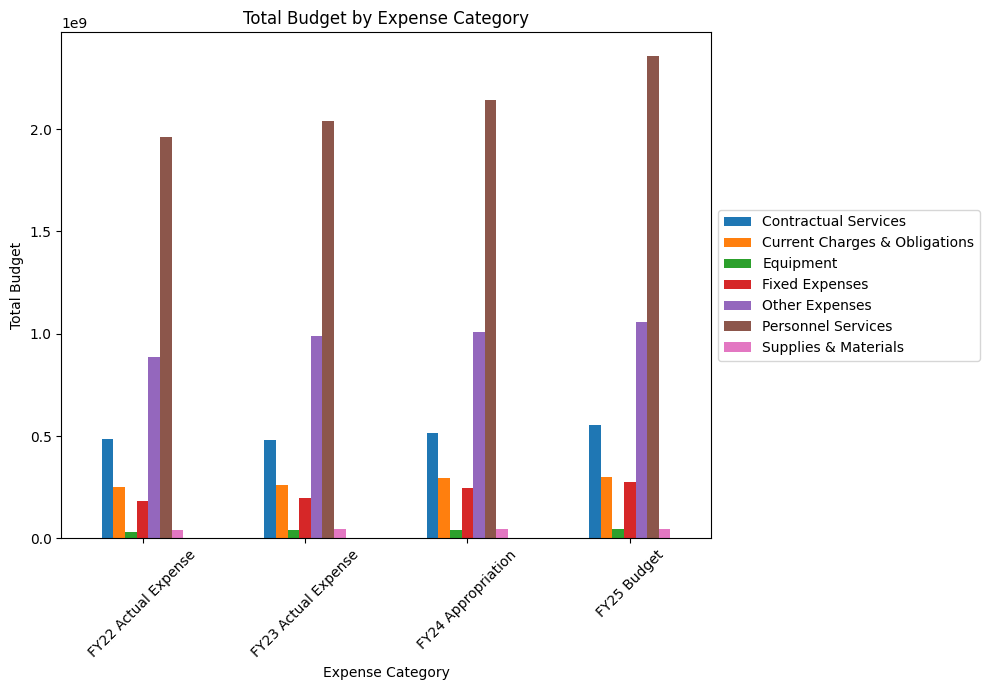

In [85]:
#plot the data

result.plot(kind='bar', figsize=(10, 7))
plt.xlabel('Expense Category')
plt.ylabel('Total Budget')
plt.title('Total Budget by Expense Category')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [86]:
# read the data
df2020 = pd.read_csv('2020_earnings.csv', encoding='latin1')  
df2021 = pd.read_csv('employee-earnings-report-2021.csv', encoding='latin1')
df2022 = pd.read_csv('employee-earnings-report-2022.csv', encoding='latin1')
df2023 = pd.read_csv('employee-earnings-report-2023.csv',encoding='latin1')
df2024 = pd.read_csv('employee_earnings_report_2024.csv',encoding='latin1')
#2020年top10收入部门
df2020[' TOTAL EARNINGS '] = df2020[' TOTAL EARNINGS '].replace('[\$,]', '', regex=True).astype(float) 
year2020 = df2020.groupby('DEPARTMENT_NAME')[' TOTAL EARNINGS '].sum().sort_values(ascending=False)
year2020 = year2020.head(10)
#2021年top10收入部门
df2021['TOTAL_GROSS'] = df2021['TOTAL_GROSS'].replace('[\$,]', '', regex=True).astype(float) 
year2021 = df2021.groupby('DEPARTMENT_NAME')['TOTAL_GROSS'].sum().sort_values(ascending=False)
year2021= year2021.head(10)
#2022年top10收入部门
df2022['TOTAL_ GROSS'] = df2022['TOTAL_ GROSS'].replace('[\$,]', '', regex=True).astype(float)
year2022 = df2022.groupby('DEPARTMENT_NAME')['TOTAL_ GROSS'].sum().sort_values(ascending=False)
year2022= year2022.head(10)
#2023年top10收入部门
df2023['TOTAL GROSS'] = df2023['TOTAL GROSS'].replace('[\$,]', '', regex=True).astype(float)
year2023 = df2023.groupby('DEPARTMENT_NAME')['TOTAL GROSS'].sum().sort_values(ascending=False)
year2023= year2023.head(10)
#2024年top10收入部门
df2024['TOTAL GROSS'] = df2024['TOTAL GROSS'].replace('[\$,]', '', regex=True).astype(float)
year2024 = df2024.groupby('DEPARTMENT_NAME')['TOTAL GROSS'].sum().sort_values(ascending=False)
year2024= year2024.head(10)

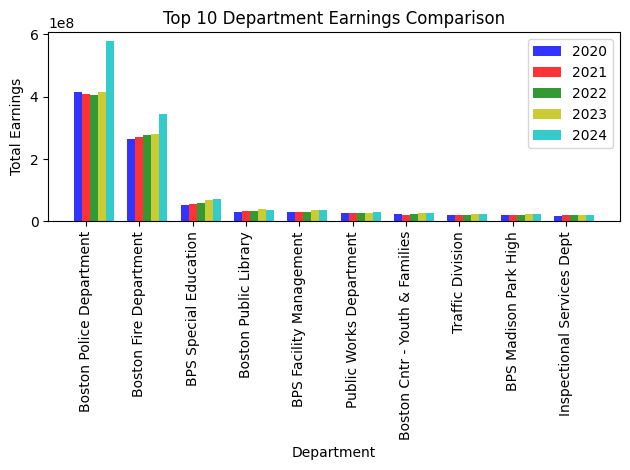

In [87]:
#把year2020,year2021,year2022,year2023,year2024画图，比较top10部门的收入
fig, ax = plt.subplots()
index = np.arange(10)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, year2020, bar_width, alpha=opacity, color='b', label='2020')
rects2 = plt.bar(index + bar_width, year2021, bar_width, alpha=opacity, color='r', label='2021')
rects3 = plt.bar(index + bar_width*2, year2022, bar_width, alpha=opacity, color='g', label='2022')
rects4 = plt.bar(index + bar_width*3, year2023, bar_width, alpha=opacity, color='y', label='2023')
rects5 = plt.bar(index + bar_width*4, year2024, bar_width, alpha=opacity, color='c', label='2024')

plt.xlabel('Department')
plt.ylabel('Total Earnings')
plt.title('Top 10 Department Earnings Comparison')
plt.xticks(index + bar_width, year2020.index, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

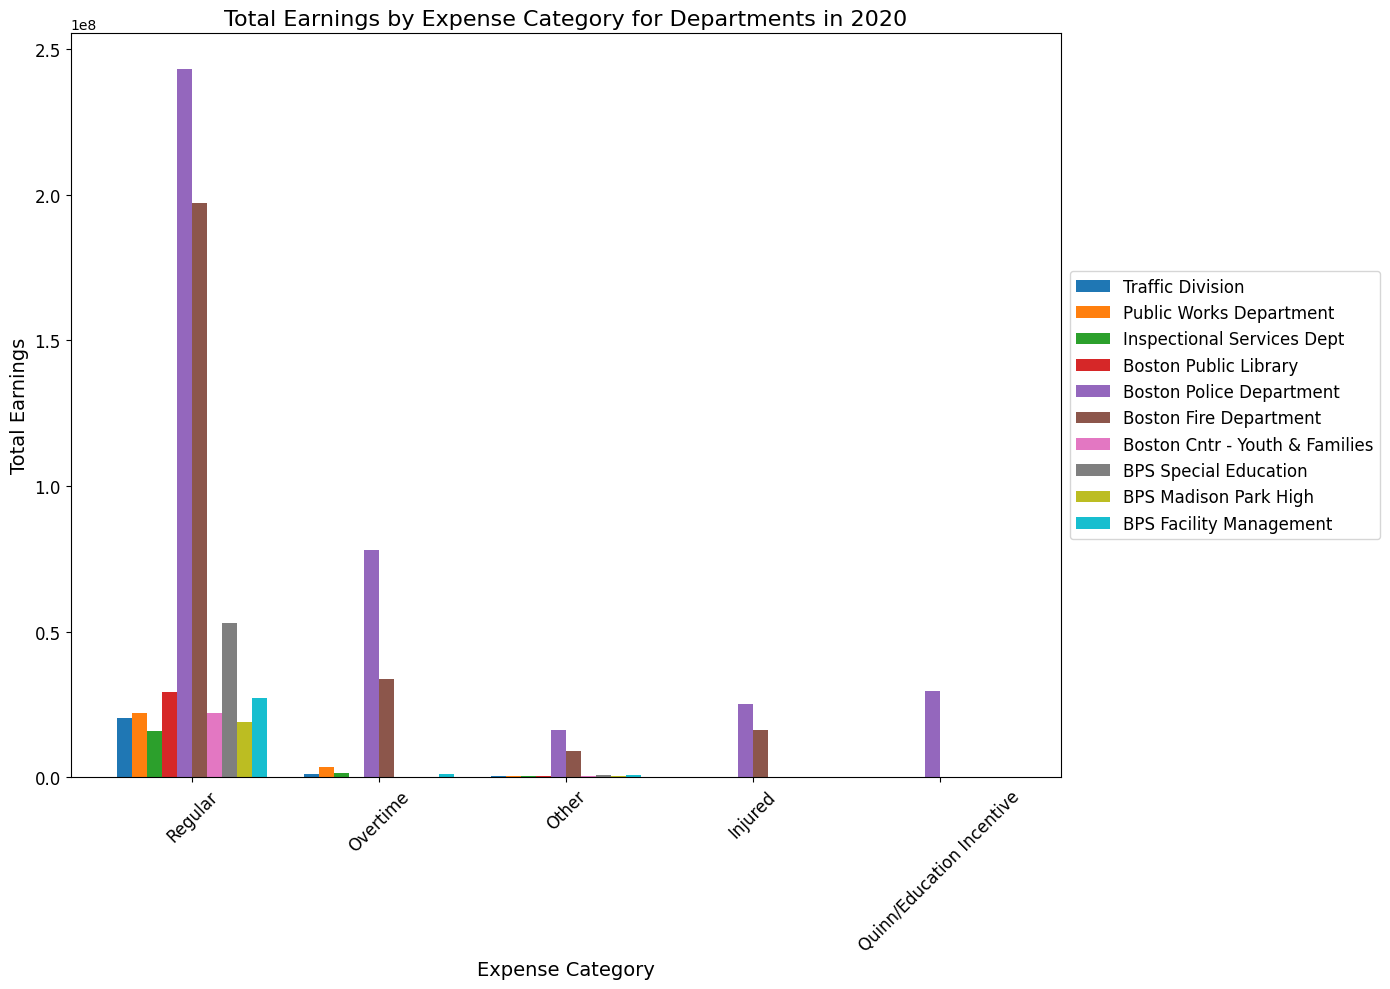

In [88]:
#我只需要之前得到的前十个部门的相关数据就可以了
df2020 = df2020[df2020['DEPARTMENT_NAME'].isin(year2020.index)]

cols_needed = ['DEPARTMENT_NAME', ' REGULAR ', ' OVERTIME ', ' OTHER ', ' INJURED ',' QUINN / EDUCATION INCENTIVE ']  
df2020_polted = df2020[cols_needed].copy()

for col in df2020_polted.columns[1:]:
    df2020_polted[col] = (
        df2020_polted[col]
        .replace('[\$,]', '', regex=True) 
        .replace(r'\((.*?)\)', r'-\1', regex=True) 
        .astype(float) 
    )


df2020_sum = df2020_polted.groupby('DEPARTMENT_NAME').sum()
df2020_sum = df2020_sum.reset_index()

df2020_sum = df2020_sum.sort_index(ascending=False)
df2020_sum = df2020_sum.set_index('DEPARTMENT_NAME')

df2020_sum = df2020_sum.T
df2020_sum = df2020_sum.rename(index={' REGULAR ': 'Regular', ' OVERTIME ': 'Overtime', ' OTHER ': 'Other', ' INJURED ': 'Injured', ' QUINN / EDUCATION INCENTIVE ': 'Quinn/Education Incentive'})



df2020_sum.plot(kind='bar', figsize=(14, 10), width=0.8)  
plt.xlabel('Expense Category', fontsize=14) 
plt.ylabel('Total Earnings', fontsize=14) 
plt.title('Total Earnings by Expense Category for Departments in 2020', fontsize=16)  
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)  
plt.xticks(rotation=45, fontsize=12)  
plt.yticks(fontsize=12)
plt.tight_layout()  #
plt.show()




Index(['NAME', 'DEPARTMENT_NAME', 'TITLE', 'REGULAR', 'RETRO', 'OTHER',
       'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION', 'TOTAL GROSS',
       'POSTAL'],
      dtype='object')
['Boston Police Department' 'Facilities Management'
 'Boston Fire Department' 'Public Works Department' 'Special Education'
 'Traffic Division' 'Boston Public Library' 'Madison Park Tech Vocational'
 'Boston Latin' 'Transportation']


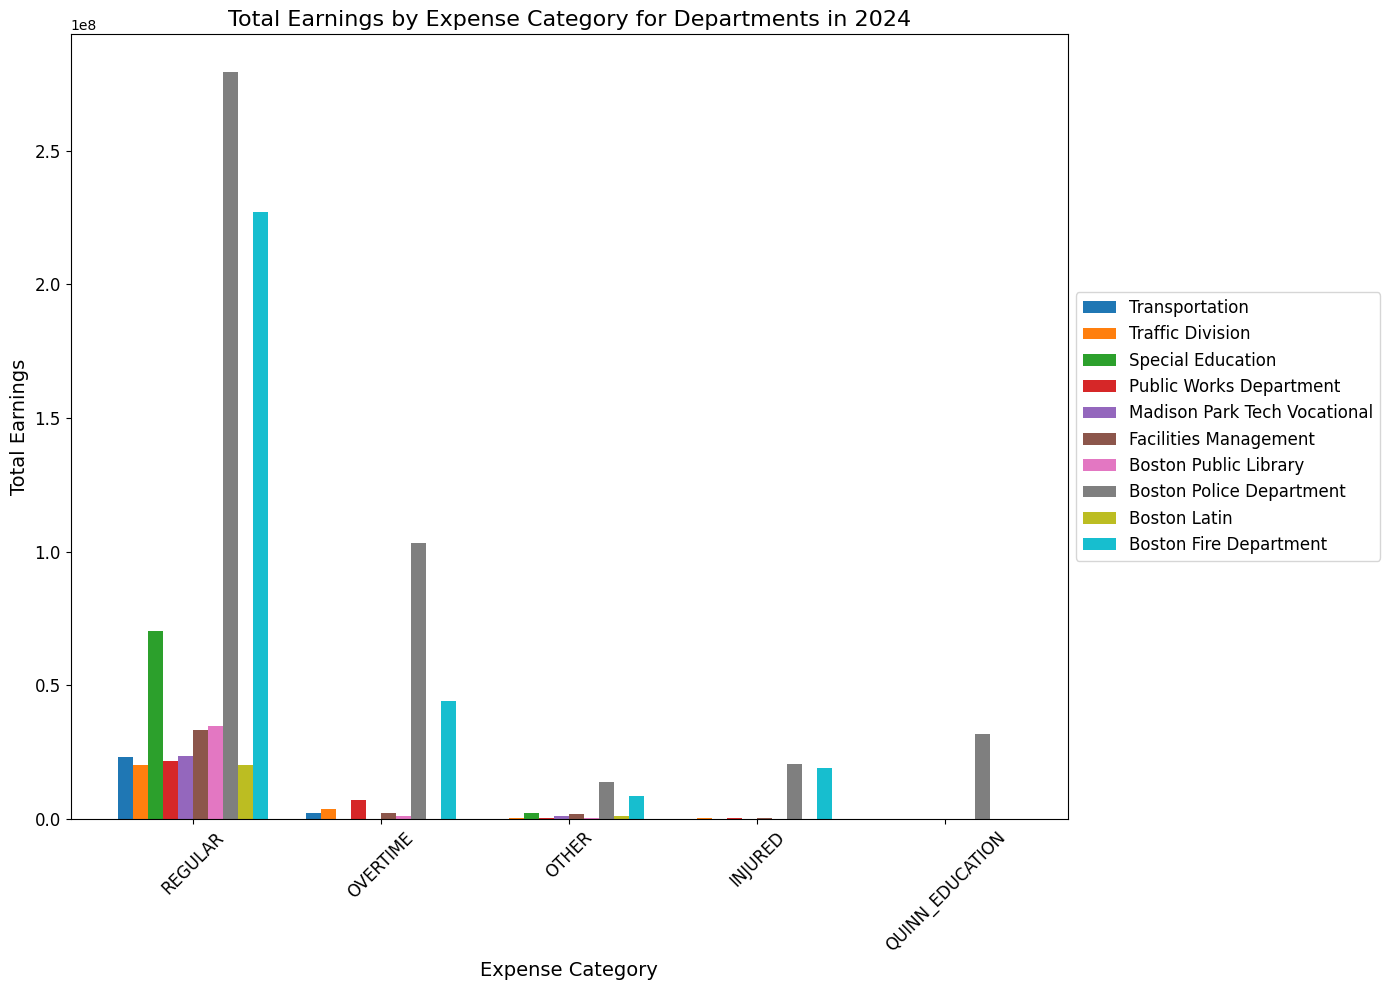

In [89]:
df2024 = df2024[df2024['DEPARTMENT_NAME'].isin(year2024.index)]
print(df2024.columns)
print(df2024['DEPARTMENT_NAME'].unique())
cols_needed_2024 = ['DEPARTMENT_NAME', 'REGULAR', 'OVERTIME', 'OTHER', 'INJURED','QUINN_EDUCATION']
df2024_polted = df2024[cols_needed_2024].copy()

for col in df2024_polted.columns[1:]:
    df2024_polted[col] = (
        df2024_polted[col]
        .replace('[\$,]', '', regex=True) 
        .replace(r'\((.*?)\)', r'-\1', regex=True) 
        .astype(float) 
    )

df2024_sum = df2024_polted.groupby('DEPARTMENT_NAME').sum()
df2024_sum = df2024_sum.reset_index()
df2024_sum = df2024_sum.sort_index(ascending=False)
df2024_sum = df2024_sum.set_index('DEPARTMENT_NAME')
df2024_sum = df2024_sum.T
df2024_sum = df2024_sum.rename(index={' REGULAR ': 'Regular', ' OVERTIME ': 'Overtime', ' OTHER ': 'Other', ' INJURED ': 'Injured', ' QUINN / EDUCATION INCENTIVE ': 'Quinn/Education Incentive'})

df2024_sum.plot(kind='bar', figsize=(14, 10), width=0.8)
plt.xlabel('Expense Category', fontsize=14)
plt.ylabel('Total Earnings', fontsize=14)
plt.title('Total Earnings by Expense Category for Departments in 2024', fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  
plt.show()


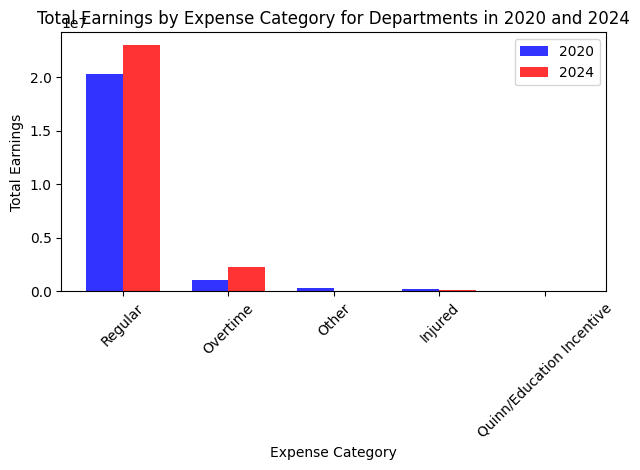

In [90]:
#现在把2020年和2024年的数据进行对比，画一个图
fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35
opacity = 0.8
rects1 = plt.bar(index, df2020_sum.iloc[:, 0], bar_width, alpha=opacity, color='b', label='2020')
rects2 = plt.bar(index + bar_width, df2024_sum.iloc[:, 0], bar_width, alpha=opacity, color='r', label='2024')
plt.xlabel('Expense Category')
plt.ylabel('Total Earnings')
plt.title('Total Earnings by Expense Category for Departments in 2020 and 2024')
plt.xticks(index + bar_width / 2, df2020_sum.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



2020 Injured - Max: 25272021.09, Mean: 4231181.3149999995, Variance: 80574886206358.27
2024 Injured - Max: 20552550.44, Mean: 4105282.082, Variance: 68899807503967.93


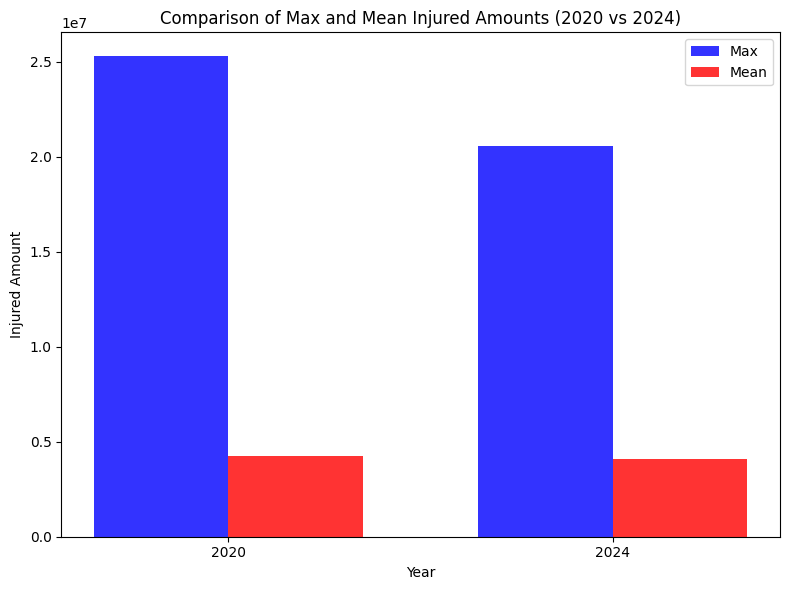

In [91]:
#我想要分析得到2020到2024年的injured的最大值和平均值以及方差，并且画图
df2020_injured = df2020_polted.groupby('DEPARTMENT_NAME')[' INJURED '].sum()
df2020_injured = df2020_injured.reset_index()
df2020_injured = df2020_injured.sort_index(ascending=False)
df2020_injured = df2020_injured.set_index('DEPARTMENT_NAME')
df2020_injured = df2020_injured.rename(index={' INJURED ': 'Injured'})
df2020_injured = df2020_injured.T


df2024_injured = df2024_polted.groupby('DEPARTMENT_NAME')['INJURED'].sum()
df2024_injured = df2024_injured.reset_index()
df2024_injured = df2024_injured.sort_index(ascending=False)
df2024_injured = df2024_injured.set_index('DEPARTMENT_NAME')
df2024_injured = df2024_injured.rename(index={'INJURED': 'Injured'})
df2024_injured = df2024_injured.T


# 计算injured的最大值和平均值以及方差
max_2020 = df2020_injured.max(axis=1).values[0]
mean_2020 = df2020_injured.mean(axis=1).values[0]
var_2020 = df2020_injured.var(axis=1).values[0]
print(f"2020 Injured - Max: {max_2020}, Mean: {mean_2020}, Variance: {var_2020}")
max_2024 = df2024_injured.max(axis=1).values[0]
mean_2024 = df2024_injured.mean(axis=1).values[0]
var_2024 = df2024_injured.var(axis=1).values[0]
print(f"2024 Injured - Max: {max_2024}, Mean: {mean_2024}, Variance: {var_2024}")

labels = ['2020', '2024']
max_values = [max_2020, max_2024]
mean_values = [mean_2020, mean_2024]

x = np.arange(len(labels))  
bar_width = 0.35 

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - bar_width / 2, max_values, bar_width, label='Max', color='b', alpha=0.8)
rects2 = ax.bar(x + bar_width / 2, mean_values, bar_width, label='Mean', color='r', alpha=0.8)
ax.set_xlabel('Year')
ax.set_ylabel('Injured Amount')
ax.set_title('Comparison of Max and Mean Injured Amounts (2020 vs 2024)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.show()


In [92]:
#2020年top10职位收入,我只想要department是Boston Police Department的数据
df2020 = df2020[df2020['DEPARTMENT_NAME'] == 'Boston Police Department']
job2020 = df2020.groupby('TITLE')[' TOTAL EARNINGS '].sum().sort_values(ascending=False)
job2020 = job2020.head(10)
#2021年top10职位收入
df2021 = df2021[df2021['DEPARTMENT_NAME'] == 'Boston Police Department']
job2021 = df2021.groupby('TITLE')['TOTAL_GROSS'].sum().sort_values(ascending=False)
job2021 = job2021.head(10)
#2022年top10职位收入
df2022 = df2022[df2022['DEPARTMENT_NAME'] == 'Boston Police Department']
job2022 = df2022.groupby('TITLE')['TOTAL_ GROSS'].sum().sort_values(ascending=False)
job2022 = job2022.head(10)
#2023年top10职位收入
df2023 = df2023[df2023['DEPARTMENT_NAME'] == 'Boston Police Department']
job2023 = df2023.groupby('TITLE')['TOTAL GROSS'].sum().sort_values(ascending=False)
job2023 = job2023.head(10)
#2024年top10职位收入
df2024 = df2024[df2024['DEPARTMENT_NAME'] == 'Boston Police Department']
job2024 = df2024.groupby('TITLE')['TOTAL GROSS'].sum().sort_values(ascending=False)
job2024 = job2024.head(10)

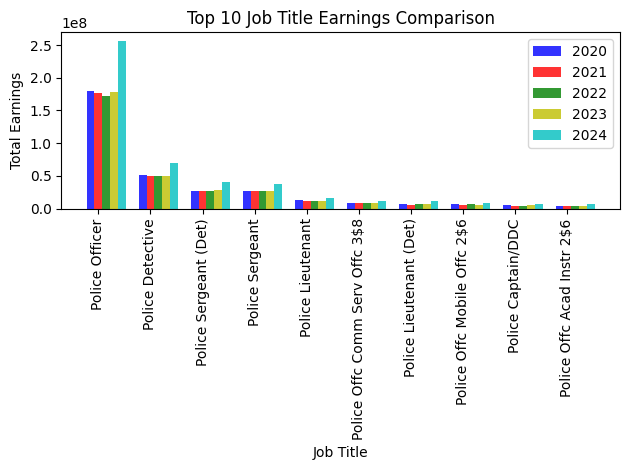

In [93]:
#把year2020,year2021,year2022,year2023,year2024画图，比较top10的收入
fig, ax = plt.subplots()
index = np.arange(10)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, job2020, bar_width, alpha=opacity, color='b', label='2020')
rects2 = plt.bar(index + bar_width, job2021, bar_width, alpha=opacity, color='r', label='2021')
rects3 = plt.bar(index + bar_width*2, job2022, bar_width, alpha=opacity, color='g', label='2022')
rects4 = plt.bar(index + bar_width*3, job2023, bar_width, alpha=opacity, color='y', label='2023')
rects5 = plt.bar(index + bar_width*4, job2024, bar_width, alpha=opacity, color='c', label='2024')

plt.xlabel('Job Title')
plt.ylabel('Total Earnings')
plt.title('Top 10 Job Title Earnings Comparison')
plt.xticks(index + bar_width, job2020.index, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

    POSTAL  OVERTIME  TOTAL_GROSS  OVERTIME_RATIO
0    01119  54546.39    146909.03            0.37
1    01420  77108.85    237158.04            0.33
2    01460 111089.14    369402.15            0.30
3    01464  47412.79    283319.23            0.17
4    01501  55375.57    247833.44            0.22
..     ...       ...          ...             ...
165  03036   9076.23    158330.84            0.06
166  03044   1669.16    235320.37            0.01
167  03053  23929.01    199933.49            0.12
168  03079  26335.18    122105.49            0.22
169  03561  87162.19    359964.63            0.24

[170 rows x 4 columns]


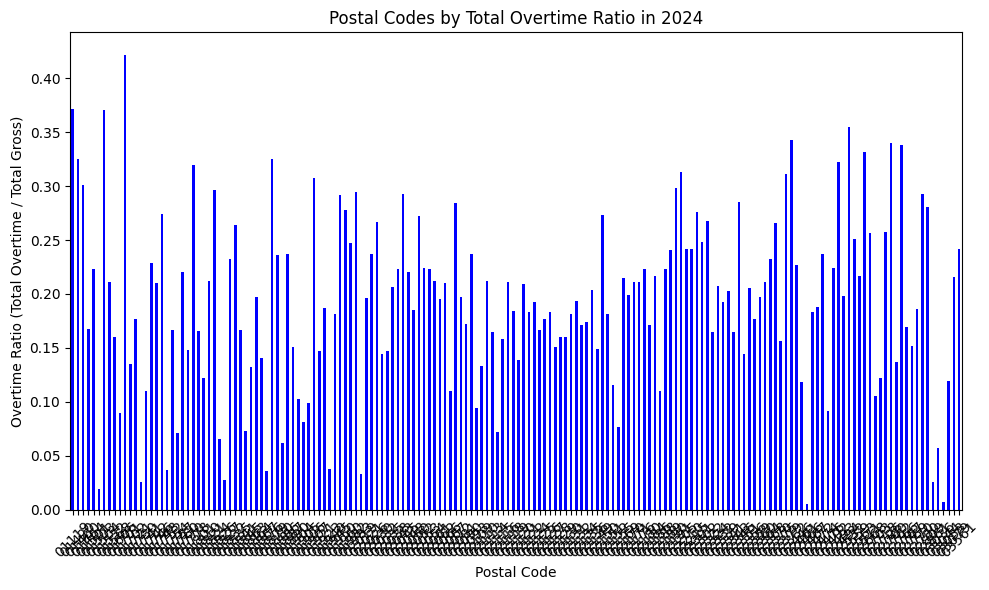

In [106]:
df2024 = df2024[df2024['DEPARTMENT_NAME'] == 'Boston Police Department']

# 清理数据并计算加班比例
df2024['OVERTIME'] = df2024['OVERTIME'].replace('[\$,]', '', regex=True).astype(float)
df2024['TOTAL_GROSS'] = df2024['TOTAL GROSS'].replace('[\$,]', '', regex=True).astype(float)

# 按邮政编码分组，计算加班总和和总收入总和
df2024_sum = df2024.groupby('POSTAL').agg({'OVERTIME': 'sum', 'TOTAL_GROSS': 'sum'}).reset_index()

# 计算加班总和占总收入总和的比例
df2024_sum['OVERTIME_RATIO'] = df2024_sum['OVERTIME'] / df2024_sum['TOTAL_GROSS']

# 打印结果
print(df2024_sum)

# 绘制柱状图
fig, ax = plt.subplots(figsize=(10, 6))
df2024_sum.plot(kind='bar', x='POSTAL', y='OVERTIME_RATIO', ax=ax, legend=False, color='b')
plt.xlabel('Postal Code')
plt.ylabel('Overtime Ratio (Total Overtime / Total Gross)')
plt.title('Postal Codes by Total Overtime Ratio in 2024')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()